In [ ]:
!pip install ipython-autotime
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.9 MB/s 
     |████████████████████████████████| 133 kB 51.0 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=37376f0bc6cb6952f40e9a15cec9cde1878586d703898c5a5cd4fa90f4275434
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from joblib import dump, load

In [ ]:
import lightgbm as lgb

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# Load Dataset

## Baseline Dataset

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/train_df.csv")
test_df = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/test_df.csv")
train_df.head()

,NPI,Tot_Benes_Mean,Tot_Srvcs_Mean,Tot_Bene_Day_Srvcs_Mean,Avg_Sbmtd_Chrg_Mean,Avg_Mdcr_Alowd_Amt_Mean,Avg_Mdcr_Pymt_Amt_Mean,Is_Fraud,Is_Male,Tot_Suplrs_Mean,...,Surgical Oncology,Thoracic Surgery,Undefined Physician type,Undersea and Hyperbaric Medicine,Urology,Vascular Surgery,Opioid_Tot_Drug_Cst_Missing,Opioid_Tot_Suply_Missing,Opioid_LA_Tot_Drug_Cst_Missing,Opioid_LA_Tot_Suply_Missing
0,1942294194,60.642857,96.642857,96.642857,216.477855,95.394587,74.656983,0.0,1.0,2.000000,...,0,0,0,0,0,0,0.0,0.0,1.0,1.0
1,1508965187,29.333333,32.833333,31.083333,463.666667,125.811621,99.238639,0.0,0.0,2.750000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,1992790315,28.000000,42.666667,42.666667,23.737179,7.180476,6.156374,0.0,1.0,9.000000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,1538164637,177.828571,259.485714,245.971429,277.273075,90.160440,68.922831,0.0,1.0,3.666667,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
4,1336368661,43.653846,82.480769,65.807692,818.563984,261.450147,207.475945,0.0,1.0,1.600000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
print(train_df["Is_Fraud"].value_counts())
print(test_df["Is_Fraud"].value_counts())

0.0    210665
1.0        85
Name: Is_Fraud, dtype: int64
0.0    52667
1.0       21
Name: Is_Fraud, dtype: int64


## Datasets Generated Using Resampling Methods

In [ ]:
X_train_adasyn = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/X_train_adasyn.csv")
y_train_adasyn = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/y_train_adasyn.csv")

In [ ]:
y_train_adasyn.value_counts()

Is_Fraud
0.0         210665
1.0         210644
dtype: int64

In [ ]:
X_train_smote_enn = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/X_train_smote_enn.csv")
y_train_smote_enn = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/y_train_smote_enn.csv")

In [ ]:
y_train_smote_enn.value_counts()

Is_Fraud
1.0         210665
0.0         209900
dtype: int64

In [ ]:
X_train_svm_smote = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/X_train_svm_smote_under.csv")
y_train_svm_smote = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/y_train_svm_smote_under.csv")

In [ ]:
y_train_svm_smote.value_counts()

Is_Fraud
0.0         115893
1.0         115893
dtype: int64

# Data Preprocessing

In [ ]:
X_train, y_train = train_df.drop(columns=["NPI", "Is_Fraud"]), train_df["Is_Fraud"]
X_test, y_test = test_df.drop(columns=["NPI", "Is_Fraud"]), test_df["Is_Fraud"]

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train.head()

,Tot_Benes_Mean,Tot_Srvcs_Mean,Tot_Bene_Day_Srvcs_Mean,Avg_Sbmtd_Chrg_Mean,Avg_Mdcr_Alowd_Amt_Mean,Avg_Mdcr_Pymt_Amt_Mean,Is_Male,Tot_Suplrs_Mean,Tot_Suplr_Benes_Mean,Tot_Suplr_Clms_Mean,...,Surgical Oncology,Thoracic Surgery,Undefined Physician type,Undersea and Hyperbaric Medicine,Urology,Vascular Surgery,Opioid_Tot_Drug_Cst_Missing,Opioid_Tot_Suply_Missing,Opioid_LA_Tot_Drug_Cst_Missing,Opioid_LA_Tot_Suply_Missing
0,-0.162963,-0.149922,-0.177403,-0.133186,0.046098,0.052374,0.814238,-0.578714,-0.487935,0.011593,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,1.365610,1.365610
1,-0.877559,-0.299360,-0.840665,0.480401,0.470132,0.484953,-1.228141,-0.362674,-0.487935,-0.384234,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
2,-0.907990,-0.276331,-0.723477,-0.611618,-1.183664,-1.153075,0.814238,1.437659,-0.014554,-0.087364,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
3,2.511633,0.231446,1.333345,0.017724,-0.026869,-0.048533,0.814238,-0.098625,-0.119750,0.105837,...,-0.030197,-0.035078,-0.020205,-0.015558,6.203312,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
4,-0.550713,-0.183089,-0.489360,1.361349,2.361022,2.389675,0.814238,-0.693936,-0.119750,-0.387061,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273


# LightGBM

### Base Model

In [ ]:
lgbm_clf = lgb.LGBMClassifier(boosting_type='gbdt' ,objective='binary', random_state=42)

### Class weight
wj=n_samples / (n_classes * n_samplesj)

In [ ]:
n_samples= len(train_df)
n_classes= len(train_df['Is_Fraud'].unique())
n_samples0= len(train_df[train_df['Is_Fraud']==0])
n_samples1= len(train_df[train_df['Is_Fraud']==1])

In [ ]:
w0 = n_samples/ (n_classes * n_samples0)
w1 = n_samples/ (n_classes * n_samples1)

In [ ]:
print(w0, w1)

0.5002017421023901 1239.7058823529412


In [ ]:
%load_ext autotime

time: 521 µs (started: 2022-11-18 05:51:42 +00:00)


In [ ]:
lgbm_param_grid_search = {
    'boosting_type': ['gbdt', 'dart', 'goss'], # default gbdt
    'learning_rate': [0.001, 0.01, 0.1], # default 0.1
    'class_weight': [None , 'balanced', {0:w0, 1:w1}] # default None
}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

time: 2.15 ms (started: 2022-11-17 12:06:08 +00:00)


In [ ]:
lgbm_grid = GridSearchCV(lgbm_clf, param_grid= lgbm_param_grid_search, cv=kfold, n_jobs=-1, scoring='average_precision')
lgbm_grid.fit(X_train, y_train)
# time: 35min 8s (started: 2022-11-17 02:37:39 +00:00)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(objective='binary', random_state=42),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'class_weight': [None, 'balanced',
                                          {0: 0.5002017421023901,
                                           1: 1239.7058823529412}],
                         'learning_rate': [0.001, 0.01, 0.1]},
             scoring='average_precision')

time: 32min 51s (started: 2022-11-17 15:18:48 +00:00)


In [ ]:
print(lgbm_grid.best_params_)
print(lgbm_grid.best_score_)

{'boosting_type': 'dart', 'class_weight': 'balanced', 'learning_rate': 0.1}
0.005686259795834722
time: 1.79 ms (started: 2022-11-17 15:51:40 +00:00)


In [ ]:
'''
{'boosting_type': 'dart', 'class_weight': 'balanced', 'learning_rate': 0.1}
0.005686259795834722
time: 1.59 ms (started: 2022-11-17 03:12:47 +00:00)
'''

"\n{'boosting_type': 'dart', 'class_weight': 'balanced', 'learning_rate': 0.1}\n0.005686259795834722\ntime: 1.59 ms (started: 2022-11-17 03:12:47 +00:00)\n"

time: 8.72 ms (started: 2022-11-17 15:51:40 +00:00)


In [ ]:
lgbm_clf2 = lgb.LGBMClassifier(boosting_type='dart' ,objective='binary', learning_rate=0.1, class_weight='balanced', random_state=42)
lgbm_clf2.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight='balanced',
               objective='binary', random_state=42)

time: 21.7 s (started: 2022-11-18 05:52:04 +00:00)


In [ ]:
y_pred = lgbm_clf2.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

time: 375 ms (started: 2022-11-18 05:52:33 +00:00)


In [ ]:
%unload_ext autotime

Text(33.0, 0.5, 'Ground Truth')

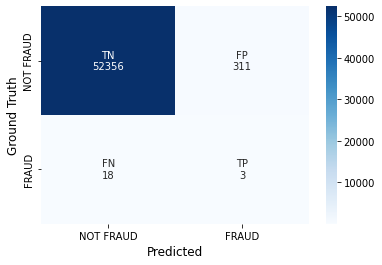

In [ ]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels_baseline = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cf_matrix, annot=labels_baseline, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'])
s.set_xlabel("Predicted", fontsize=12)
s.set_ylabel("Ground Truth", fontsize=12)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     52667
         1.0       0.01      0.14      0.02        21

    accuracy                           0.99     52688
   macro avg       0.50      0.57      0.51     52688
weighted avg       1.00      0.99      1.00     52688



In [ ]:
dump(lgbm_grid, '/content/drive/MyDrive/BT4012 Project/Submission Folder/Models/lgbm_grid.joblib')

['/content/drive/MyDrive/BT4012 Project/Submission Folder/Models/lgbm_grid.joblib']

# ROC AUC, PR AUC

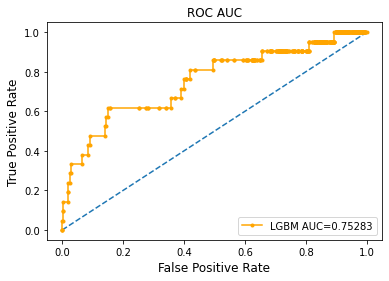

In [ ]:
lgbm_proba = lgbm_clf2.predict_proba(X_test)[::,1]
lgbm_fpr, lgbm_tpr, lgb_threshold = roc_curve(y_test, lgbm_proba)
lgbm_roc_auc = round(roc_auc_score(y_test, lgbm_proba),5)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, thresholds = roc_curve(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label="LGBM AUC="+str(lgbm_roc_auc), color="orange")
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.title('ROC AUC')
plt.legend(loc=4)
plt.show()

LGBM: F1=0.018 PR AUC=0.005


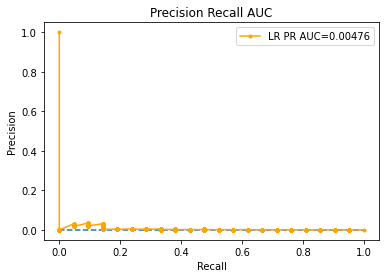

In [ ]:
lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, lgbm_proba)
lgbm_f1, lgbm_pr_auc = f1_score(y_test, y_pred), auc(lgbm_recall, lgbm_precision)
print('LGBM: F1=%.3f PR AUC=%.3f' % (lgbm_f1, lgbm_pr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(lgbm_recall, lgbm_precision, marker='.', label="LR PR AUC="+str(round(lgbm_pr_auc,5)), color="orange")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall AUC')
plt.legend()
plt.show()

# Results

## Without Weight on Train

In [ ]:
lgbm_clf3 = lgb.LGBMClassifier(boosting_type='dart' ,objective='binary', learning_rate=0.1, random_state=42)
lgbm_clf3.fit(X_train, y_train)

y_pred_wo_weight = lgbm_clf3.predict(X_train)

lgbm_proba_wo_weight = lgbm_clf3.predict_proba(X_train)[::,1]
lgbm_fpr_wo_weight, lgbm_tpr_wo_weight, _ = roc_curve(y_train, lgbm_proba_wo_weight)
lgbm_precision_wo_weight, lgbm_recall_wo_weight, _ = precision_recall_curve(y_train, lgbm_proba_wo_weight)

lgbm_roc_auc_wo_weight = round(roc_auc_score(y_train, lgbm_proba_wo_weight),5)
lgbm_pr_auc_wo_weight = round(average_precision_score(y_train, lgbm_proba_wo_weight),5)

lgbm_precision_wo_weight = round(precision_score(y_train, y_pred_wo_weight), 5)
lgbm_recall_wo_weight = round(recall_score(y_train, y_pred_wo_weight), 5)
lgbm_specificity_wo_weight = round(recall_score(y_train, y_pred_wo_weight, pos_label=0), 5)

print(lgbm_roc_auc_wo_weight, lgbm_pr_auc_wo_weight, lgbm_precision_wo_weight, lgbm_recall_wo_weight, 1- lgbm_specificity_wo_weight)

0.66042 0.07983 0.27907 0.14118 0.00014999999999998348
time: 22.6 s (started: 2022-11-17 16:06:49 +00:00)


## Without Weight on Test

In [ ]:
lgbm_clf4 = lgb.LGBMClassifier(boosting_type='dart' ,objective='binary', learning_rate=0.1, random_state=42)
lgbm_clf4.fit(X_train, y_train)

y_pred_wo_weight = lgbm_clf4.predict(X_test)

lgbm_proba_wo_weight = lgbm_clf4.predict_proba(X_test)[::,1]
lgbm_fpr_wo_weight, lgbm_tpr_wo_weight, _ = roc_curve(y_test, lgbm_proba_wo_weight)
lgbm_precision_wo_weight, lgbm_recall_wo_weight, _ = precision_recall_curve(y_test, lgbm_proba_wo_weight)

lgbm_roc_auc_wo_weight = round(roc_auc_score(y_test, lgbm_proba_wo_weight),5)
lgbm_pr_auc_wo_weight = round(average_precision_score(y_test, lgbm_proba_wo_weight),5)

lgbm_precision_wo_weight = round(precision_score(y_test, y_pred_wo_weight), 5)
lgbm_recall_wo_weight = round(recall_score(y_test, y_pred_wo_weight), 5)
lgbm_specificity_wo_weight = round(recall_score(y_test, y_pred_wo_weight, pos_label=0), 5)

print(lgbm_roc_auc_wo_weight, lgbm_pr_auc_wo_weight, lgbm_precision_wo_weight, lgbm_recall_wo_weight, 1- lgbm_specificity_wo_weight)

0.38362 0.00046 0.0 0.0 0.0009700000000000264
time: 19.3 s (started: 2022-11-17 16:07:12 +00:00)


In [ ]:
'''lgbm_clf5 = lgb.LGBMClassifier(objective='binary', learning_rate=0.01, random_state=42)
lgbm_clf5.fit(X_train, y_train)

y_pred_wo_weight = lgbm_clf5.predict(X_test)

lgbm_proba_wo_weight = lgbm_clf5.predict_proba(X_test)[::,1]
lgbm_fpr_wo_weight, lgbm_tpr_wo_weight, _ = roc_curve(y_test, lgbm_proba_wo_weight)
lgbm_precision_wo_weight, lgbm_recall_wo_weight, _ = precision_recall_curve(y_test, lgbm_proba_wo_weight)

lgbm_roc_auc_wo_weight = round(roc_auc_score(y_test, lgbm_proba_wo_weight),5)
lgbm_pr_auc_wo_weight = round(average_precision_score(y_test, lgbm_proba_wo_weight),5)

lgbm_precision_wo_weight = round(precision_score(y_test, y_pred_wo_weight), 5)
lgbm_recall_wo_weight = round(recall_score(y_test, y_pred_wo_weight), 5)
lgbm_specificity_wo_weight = round(recall_score(y_test, y_pred_wo_weight, pos_label=0), 5)

print(lgbm_roc_auc_wo_weight, lgbm_pr_auc_wo_weight, lgbm_precision_wo_weight, lgbm_recall_wo_weight, 1- lgbm_specificity_wo_weight)'''

"lgbm_clf5 = lgb.LGBMClassifier(objective='binary', learning_rate=0.01, random_state=42)\nlgbm_clf5.fit(X_train, y_train)\n\ny_pred_wo_weight = lgbm_clf5.predict(X_test)\n\nlgbm_proba_wo_weight = lgbm_clf5.predict_proba(X_test)[::,1]\nlgbm_fpr_wo_weight, lgbm_tpr_wo_weight, _ = roc_curve(y_test, lgbm_proba_wo_weight)\nlgbm_precision_wo_weight, lgbm_recall_wo_weight, _ = precision_recall_curve(y_test, lgbm_proba_wo_weight)\n\nlgbm_roc_auc_wo_weight = round(roc_auc_score(y_test, lgbm_proba_wo_weight),5)\nlgbm_pr_auc_wo_weight = round(average_precision_score(y_test, lgbm_proba_wo_weight),5)\n\nlgbm_precision_wo_weight = round(precision_score(y_test, y_pred_wo_weight), 5)\nlgbm_recall_wo_weight = round(recall_score(y_test, y_pred_wo_weight), 5)\nlgbm_specificity_wo_weight = round(recall_score(y_test, y_pred_wo_weight, pos_label=0), 5)\n\nprint(lgbm_roc_auc_wo_weight, lgbm_pr_auc_wo_weight, lgbm_precision_wo_weight, lgbm_recall_wo_weight, 1- lgbm_specificity_wo_weight)"

time: 7.66 ms (started: 2022-11-17 16:07:31 +00:00)


## With Weight on Train

In [ ]:
lgbm_clf6 = lgb.LGBMClassifier(boosting_type='dart', class_weight = 'balanced', objective='binary', learning_rate=0.1, random_state=42)
lgbm_clf6.fit(X_train, y_train)

y_pred_w_weight = lgbm_clf6.predict(X_train)

lgbm_proba_w_weight = lgbm_clf6.predict_proba(X_train)[::,1]
lgbm_fpr_w_weight, lgbm_tpr_w_weight, _ = roc_curve(y_train, lgbm_proba_w_weight)
lgbm_precision_w_weight, lgbm_recall_w_weight, _ = precision_recall_curve(y_train, lgbm_proba_w_weight)

lgbm_roc_auc_w_weight = round(roc_auc_score(y_train, lgbm_proba_w_weight),5)
lgbm_pr_auc_w_weight = round(average_precision_score(y_train, lgbm_proba_w_weight),5)

lgbm_precision_w_weight = round(precision_score(y_train, y_pred_w_weight), 5)
lgbm_recall_w_weight = round(recall_score(y_train, y_pred_w_weight), 5)
lgbm_specificity_w_weight = round(recall_score(y_train, y_pred_w_weight, pos_label=0), 5)

print(lgbm_roc_auc_w_weight, lgbm_pr_auc_w_weight, lgbm_precision_w_weight, lgbm_recall_w_weight, 1- lgbm_specificity_w_weight)

0.99975 0.44446 0.06046 1.0 0.006269999999999998
time: 26.7 s (started: 2022-11-17 16:07:31 +00:00)


## With Weight on Test

In [ ]:
lgbm_clf7 = lgb.LGBMClassifier(boosting_type='dart', class_weight = 'balanced', objective='binary', learning_rate=0.1, random_state=42)
lgbm_clf7.fit(X_train, y_train)

y_pred_w_weight = lgbm_clf7.predict(X_test)

lgbm_proba_w_weight = lgbm_clf7.predict_proba(X_test)[::,1]
lgbm_fpr_w_weight, lgbm_tpr_w_weight, _ = roc_curve(y_test, lgbm_proba_w_weight)
lgbm_precision_w_weight, lgbm_recall_w_weight, _ = precision_recall_curve(y_test, lgbm_proba_w_weight)

lgbm_roc_auc_w_weight = round(roc_auc_score(y_test, lgbm_proba_w_weight),5)
lgbm_pr_auc_w_weight = round(average_precision_score(y_test, lgbm_proba_w_weight),5)

lgbm_precision_w_weight = round(precision_score(y_test, y_pred_w_weight), 5)
lgbm_recall_w_weight = round(recall_score(y_test, y_pred_w_weight), 5)
lgbm_specificity_w_weight = round(recall_score(y_test, y_pred_w_weight, pos_label=0), 5)

print(lgbm_roc_auc_w_weight, lgbm_pr_auc_w_weight, lgbm_precision_w_weight, lgbm_recall_w_weight, 1- lgbm_specificity_w_weight)

0.75283 0.00627 0.00955 0.14286 0.005909999999999971
time: 27.9 s (started: 2022-11-17 16:07:58 +00:00)
